In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lhapdf
import pandas as pd


NNPDF4_nlo = lhapdf.mkPDF('NNPDF40_nlo_as_01180')
data = pd.read_csv("../E288.csv")
alpha = 1/137

def pdf(pdfset, flavor, x, QQ):
    return pdfset.xfxQ(flavor, x, QQ)

def S(k):
    return np.exp(-k**2)

def fDNNQ(QM, b=0.5):
    return np.exp(-b * QM)

def compute_A(x1, x2, qT, QM):
    f_u_x1 = pdf(NNPDF4_nlo, 2, x1, QM) 
    f_ubar_x2 = pdf(NNPDF4_nlo, -2, x2, QM)
    f_u_x2 = pdf(NNPDF4_nlo, 2, x2, QM)
    f_ubar_x1 = pdf(NNPDF4_nlo, -2, x1, QM)

    Sk_contribution = (1/2)*(np.pi)*(np.exp(-qT*qT/2))

    fDNN_contribution = fDNNQ(QM)

    ux1ubarx2_term = x1*x2*f_u_x1*f_ubar_x2*Sk_contribution
    ubarx1ux2_term = x2*x1*f_u_x2*f_ubar_x1*Sk_contribution
    FUU = (ux1ubarx2_term + ubarx1ux2_term) * fDNN_contribution
    cross_section =  FUU*qT*((4*np.pi*alpha)**2)/(9*QM*QM*QM)
    return cross_section


x1_values = data['xA'].values
x2_values = data['xB'].values
qT_values = data['PT'].values
QM_values = data['QM'].values


A_values = np.array([
    compute_A(x1, x2, qT, QM)
    for x1, x2, qT, QM in zip(x1_values, x2_values, qT_values, QM_values)
])

results_df = pd.DataFrame({
    'x1': x1_values,
    'x2': x2_values,
    'qT': qT_values,
    'QM': QM_values,
    'A': A_values
})

results_df.to_csv("pseudodataE288_BQM.csv", index=False)
print("Computed A values saved to A_for_E288kinematics.csv")

LHAPDF 6.5.4 loading /home/ishara/LHAPDF/LHAPDF-install/share/LHAPDF/NNPDF40_nlo_as_01180/NNPDF40_nlo_as_01180_0000.dat
NNPDF40_nlo_as_01180 PDF set, member #0, version 1; LHAPDF ID = 331700
Computed A values saved to A_for_E288kinematics.csv


/home/ishara/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


2025-02-06 12:14:52.035046: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-06 12:14:52.041208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738865692.049346  259332 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738865692.051754  259332 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 12:14:52.060660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Folder 'Models_withLHAPDF' already exists!
Folder 'Results_withLHAPDF' already exists!


I0000 00:00:1738865692.797251  259332 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6516 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/5000, Loss: 1.629e-09
Epoch 101/5000, Loss: 1.429e-09
Epoch 201/5000, Loss: 1.187e-09
Epoch 301/5000, Loss: 9.810e-10
Epoch 401/5000, Loss: 8.136e-10
Epoch 501/5000, Loss: 6.736e-10
Epoch 601/5000, Loss: 5.615e-10
Epoch 701/5000, Loss: 4.674e-10
Epoch 801/5000, Loss: 3.868e-10
Epoch 901/5000, Loss: 3.190e-10
Epoch 1001/5000, Loss: 2.641e-10
Epoch 1101/5000, Loss: 2.211e-10
Epoch 1201/5000, Loss: 1.896e-10
Epoch 1301/5000, Loss: 1.654e-10
Epoch 1401/5000, Loss: 1.487e-10
Epoch 1501/5000, Loss: 1.341e-10
Epoch 1601/5000, Loss: 1.255e-10
Epoch 1701/5000, Loss: 1.174e-10
Epoch 1801/5000, Loss: 1.103e-10
Epoch 1901/5000, Loss: 1.060e-10
Epoch 2001/5000, Loss: 1.029e-10
Epoch 2101/5000, Loss: 1.000e-10
Epoch 2201/5000, Loss: 9.733e-11
Epoch 2301/5000, Loss: 9.489e-11
Epoch 2401/5000, Loss: 9.315e-11
Epoch 2501/5000, Loss: 9.145e-11
Epoch 2601/5000, Loss: 8.979e-11
Epoch 2701/5000, Loss: 8.929e-11
Epoch 2801/5000, Loss: 8.883e-11
Epoch 2901/5000, Loss: 8.845e-11
Epoch 3001/5000, Loss:

Epoch 5000/5000, Loss: 8.450e-11
Model saved successfully!


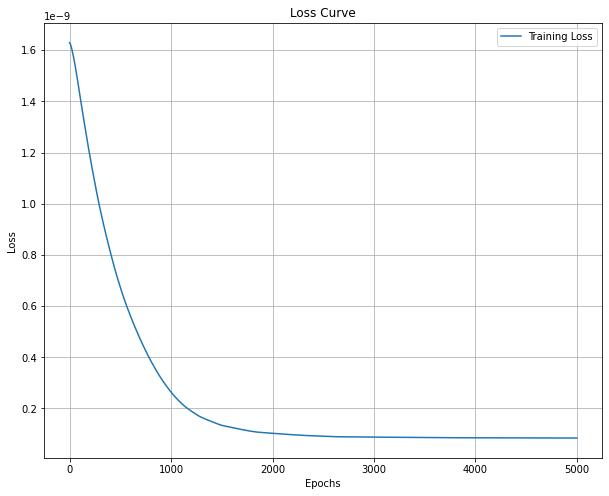

I0000 00:00:1738866899.461699  259453 service.cc:148] XLA service 0x7f5e70004cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738866899.461715  259453 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-02-06 12:34:59.464975: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738866899.476997  259453 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-06 12:34:59.580134: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:

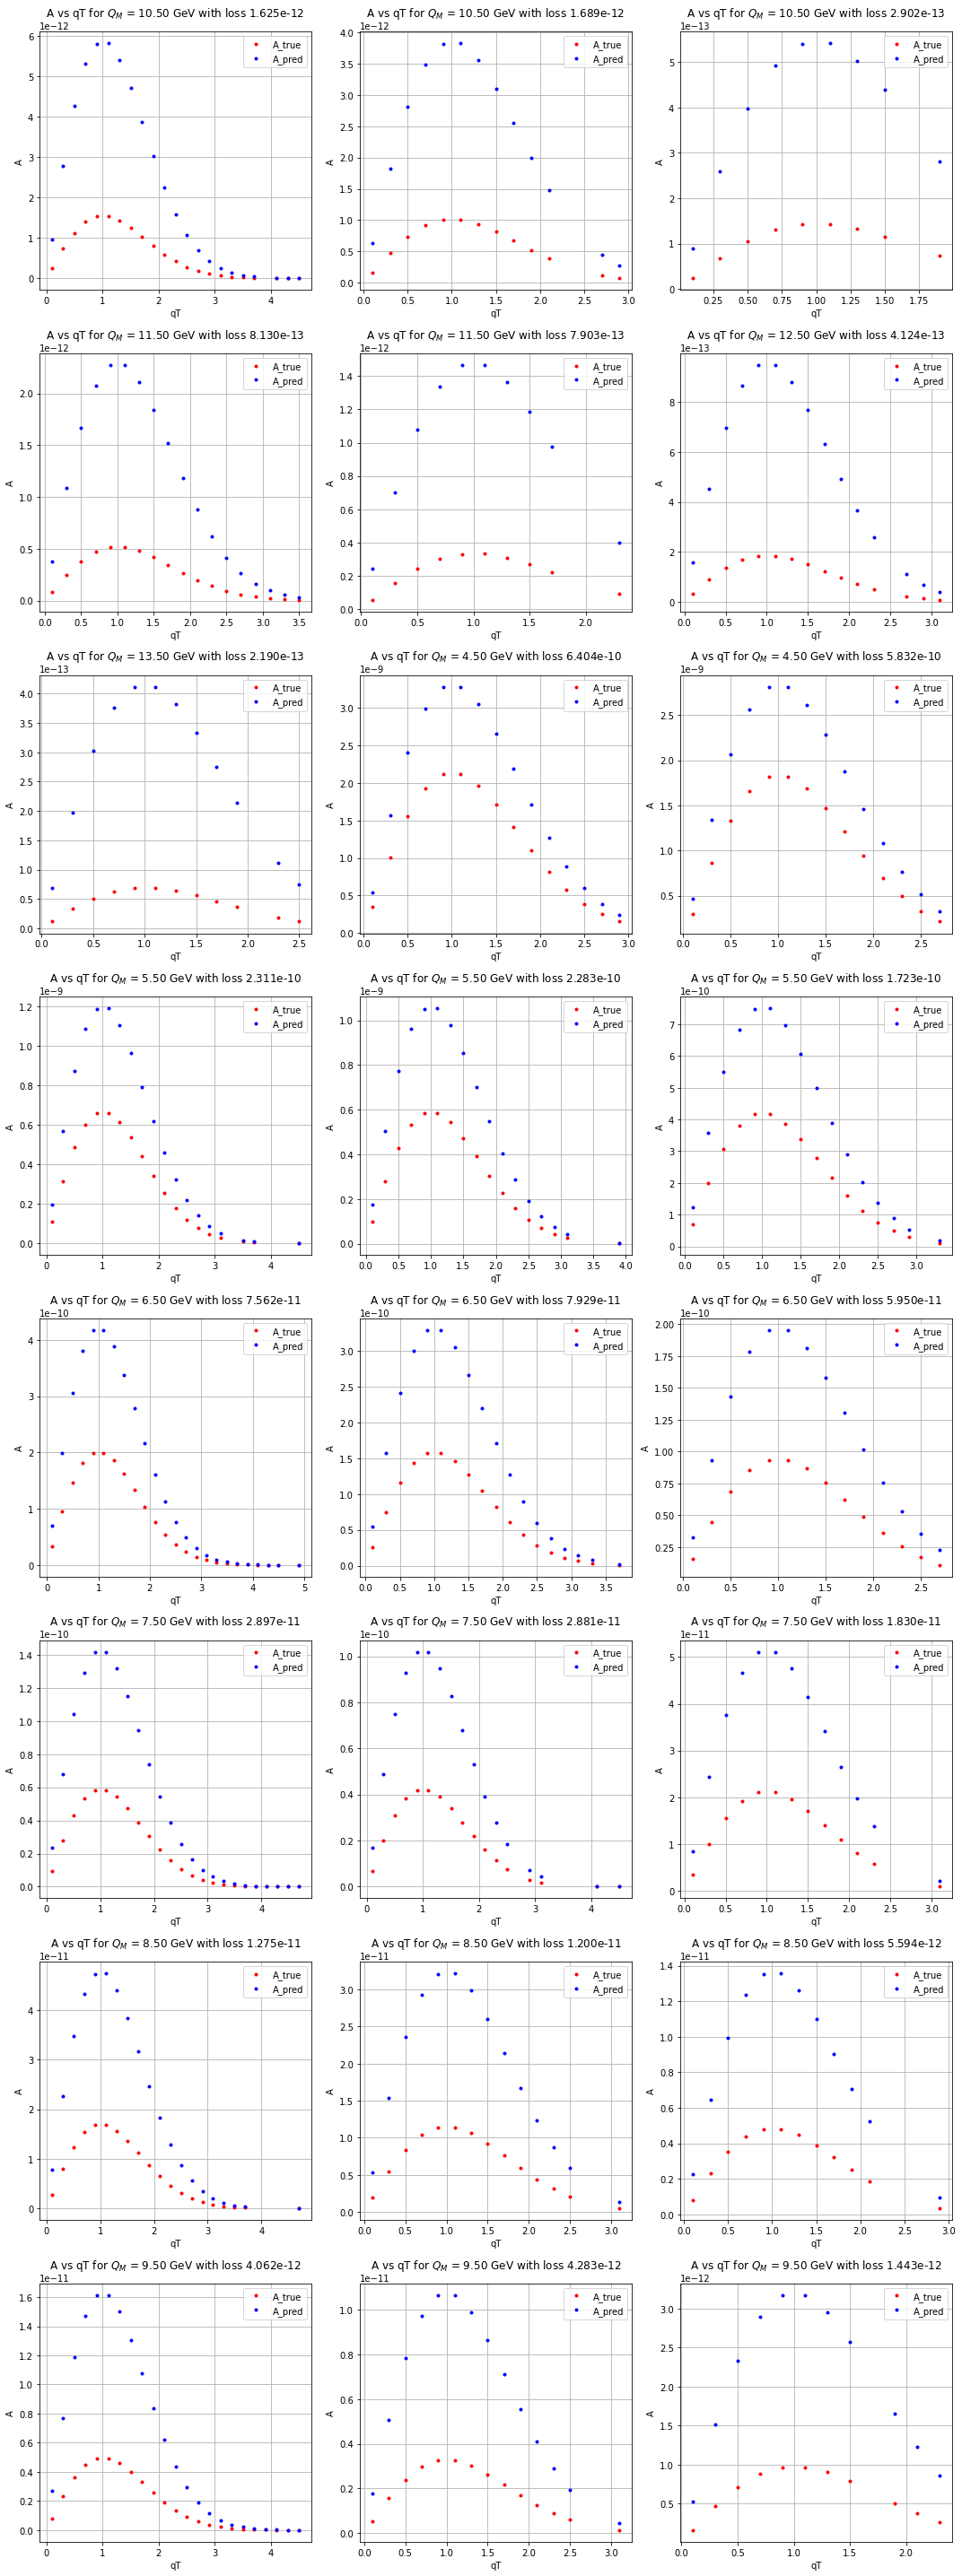

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


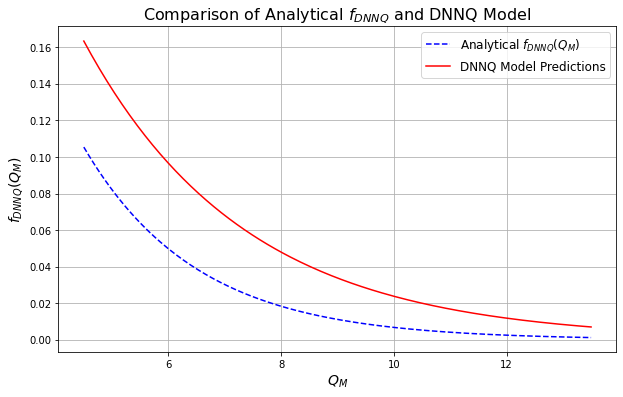

           x1        x2   qT    QM             A  \
0    0.206893  0.194844  0.1   5.5  1.093435e-10   
1    0.206893  0.194844  0.3   5.5  3.151683e-10   
2    0.206893  0.194844  0.5   5.5  4.848951e-10   
3    0.206893  0.194844  0.7   5.5  6.020887e-10   
4    0.206893  0.194844  0.9   5.5  6.596565e-10   
..        ...       ...  ...   ...           ...   
379  0.808678  0.363362  0.9  10.5  1.421042e-13   
380  0.808678  0.363362  1.1  10.5  1.421995e-13   
381  0.808678  0.363362  1.3  10.5  1.321959e-13   
382  0.808678  0.363362  1.5  10.5  1.152825e-13   
383  0.808678  0.363362  1.9  10.5  7.397852e-14   

                     unique_group        A_pred  
0     5.5_0.206892673_0.194844182  1.968747e-10  
1     5.5_0.206892673_0.194844182  5.674653e-10  
2     5.5_0.206892673_0.194844182  8.730609e-10  
3     5.5_0.206892673_0.194844182  1.084070e-09  
4     5.5_0.206892673_0.194844182  1.187721e-09  
..                            ...           ...  
379  10.5_0.808678091_0.3

In [2]:

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os


def create_folders(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Folder '{folder_name}' created successfully!")
    else:
        print(f"Folder '{folder_name}' already exists!")

models_folder = 'Models_withLHAPDF'
results_folder = 'Results_withLHAPDF'
create_folders(models_folder)
create_folders(results_folder)
alpha = 1/137


data = pd.read_csv("pseudodataE288_BQM.csv")
pseudo_df = data
x1_values = tf.constant(data['x1'].values, dtype=tf.float32)
x2_values = tf.constant(data['x2'].values, dtype=tf.float32)
qT_values = tf.constant(data['qT'].values, dtype=tf.float32)
QM_values = tf.constant(data['QM'].values, dtype=tf.float32)
A_true_values = tf.constant(data['A'].values, dtype=tf.float32)


# def DNNQ():
#     return models.Sequential([
#         layers.Input(shape=(1,)), 
#         layers.Dense(100, activation='relu6'),
#         layers.Dense(80, activation='exponential'),
#         layers.Dense(40, activation='relu6'),
#         layers.Dense(1, activation='exponential')
#     ])

# def DNNQ():
#     return models.Sequential([
#         layers.Input(shape=(1,)), 
#         layers.Dense(250, activation='relu6'),
#         layers.Dense(200, activation='exponential'),
#         layers.Dense(250, activation='relu6'),
#         layers.Dense(100, activation='exponential'),
#         layers.Dense(1, activation='exponential')
#     ])


# def DNNQ():
#     return models.Sequential([
#         layers.Input(shape=(1,)), 
#         layers.Dense(100, activation='relu6'),
#         layers.Dense(100, activation='relu6'),
#         layers.Dense(100, activation='relu6'),
#         layers.Dense(100, activation='relu6'),
#         layers.Dense(100, activation='relu6'),
#         layers.Dense(1, activation='exponential')
#     ])

def DNNQ():
    return models.Sequential([
        layers.Input(shape=(1,)), 
        layers.Dense(100, activation='relu6'),
        layers.Dense(300, activation='relu6'),
        layers.Dense(300, activation='relu6'),
        layers.Dense(250, activation='relu6'),
        layers.Dense(250, activation='relu6'),
        layers.Dense(1, activation='exponential')
    ])


dnnQ = DNNQ()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
epochs = 5000
print_epochs = 100

def pdf(pdfset, flavor, x, QQ):
    return pdfset.xfxQ(flavor, x, QQ)
    

def custom_loss(A_true, x1, x2, qT, QM):
    dnnQinputs =tf.reshape(QM, (-1, 1))
    dnnQvals = dnnQ(dnnQinputs)

    f_u_x1 = tf.constant(pdf(NNPDF4_nlo, 2, x1, QM), dtype=tf.float32)
    f_ubar_x2 = tf.constant(pdf(NNPDF4_nlo, -2, x2, QM), dtype=tf.float32)
    f_u_x2 = tf.constant(pdf(NNPDF4_nlo, 2, x2, QM), dtype=tf.float32)
    f_ubar_x1 = tf.constant(pdf(NNPDF4_nlo, -2, x1, QM), dtype=tf.float32)

    pi = tf.constant(np.pi, dtype=tf.float32)
    Sk_contribution = (1 / 2) * pi * tf.exp(-qT**2 / 2)

    ux1ubarx2_term = x1 * x2 * f_u_x1 * f_ubar_x2 * Sk_contribution
    ubarx1ux2_term = x2 * x1 * f_u_x2 * f_ubar_x1 * Sk_contribution
    FUU = ux1ubarx2_term + ubarx1ux2_term
    cross_section =  FUU*qT*((4*np.pi*alpha)**2)/(9*QM*QM*QM) * dnnQvals
    temploss = tf.abs(cross_section - A_true)
    loss = tf.reduce_mean(temploss)  # MAE loss
    return loss


losses = []
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = custom_loss(A_true_values, x1_values, x2_values, qT_values, QM_values)
    grads = tape.gradient(loss, dnnQ.trainable_variables)
    optimizer.apply_gradients(zip(grads, dnnQ.trainable_variables))
    losses.append(loss.numpy())

    if epoch % print_epochs == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy():.3e}")

dnnQ.save(os.path.join(str(models_folder), 'DNNQ_model.h5'))
print("Model saved successfully!")


plt.figure(figsize=(10, 8))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.savefig(str(results_folder)+'/Losses.pdf')
plt.show()


dnnQ_model = dnnQ

def compute_A(x1, x2, qT, QM):
    f_u_x1 = pdf(NNPDF4_nlo, 2, x1, QM)
    f_ubar_x2 = pdf(NNPDF4_nlo, -2, x2, QM)
    f_u_x2 = pdf(NNPDF4_nlo, 2, x2, QM)
    f_ubar_x1 = pdf(NNPDF4_nlo, -2, x1, QM)

    Sk_contribution = (1 / 2) * np.pi * np.exp(-qT * qT / 2)
    QM_input = QM.reshape(-1, 1)
    fDNN_contribution = dnnQ_model.predict(QM_input, verbose=0).flatten()

    ux1ubarx2_term = x1 * x2 * f_u_x1 * f_ubar_x2 * Sk_contribution
    ubarx1ux2_term = x2 * x1 * f_u_x2 * f_ubar_x1 * Sk_contribution
    FUU = (ux1ubarx2_term + ubarx1ux2_term) * fDNN_contribution
    cross_section =  FUU*qT*((4*np.pi*alpha)**2)/(9*QM*QM*QM)
    return cross_section



def loss_A(A_true, x1, x2, qT, QM):
    f_u_x1 = pdf(NNPDF4_nlo, 2, x1, QM) 
    f_ubar_x2 = pdf(NNPDF4_nlo, -2, x2, QM)
    f_u_x2 = pdf(NNPDF4_nlo, 2, x2, QM)
    f_ubar_x1 = pdf(NNPDF4_nlo, -2, x1, QM)

    Sk_contribution = (1 / 2) * np.pi * np.exp(-qT * qT / 2)
    QM_input = QM.reshape(-1, 1)  # Ensure QM is 2D for model input
    fDNN_contribution = dnnQ_model.predict(QM_input, verbose=0).flatten()  # Flatten to 1D

    ux1ubarx2_term = x1 * x2 * f_u_x1 * f_ubar_x2 * Sk_contribution
    ubarx1ux2_term = x2 * x1 * f_u_x2 * f_ubar_x1 * Sk_contribution
    FUU = ux1ubarx2_term + ubarx1ux2_term
    cross_section =  FUU*qT*((4*np.pi*alpha)**2)/(9*QM*QM*QM) * fDNN_contribution
    loss = tf.reduce_mean(tf.abs(cross_section - A_true))
    #loss = tf.reduce_mean(cross_section - A_true)
    return loss

def data_theory_plots(ax, df):
    A_true = df['A'].values
    qT = df['qT'].values
    QM = df['QM'].values
    x1 = df['x1'].values
    x2 = df['x2'].values

    A_pred = compute_A(x1, x2, qT, QM)
    temp_loss = loss_A(A_true, x1, x2, qT, QM)

    ax.plot(qT, A_true, '.', color='red', label='A_true')
    ax.plot(qT, A_pred, '.', color='blue', label='A_pred')
    ax.set_title(f'A vs qT for $Q_M$ = {QM[0]:.2f} GeV with loss {temp_loss:.3e}')
    ax.set_xlabel('qT')
    ax.set_ylabel('A')
    ax.legend()
    ax.grid(True)



pseudo_df["unique_group"] = pseudo_df["QM"].astype(str) + "_" + pseudo_df["x1"].astype(str) + "_" + pseudo_df["x2"].astype(str)
groups = pseudo_df.groupby(["unique_group"])
n_groups = groups.ngroups
ncols = 3
nrows = (n_groups + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()


for idx, (group_name, group_df) in enumerate(groups):
    data_theory_plots(axes[idx], group_df)

# for ax in axes[n_groups:]:
#     ax.axis('off')

plt.tight_layout()
plt.savefig(str(results_folder)+'/QM_subplots_with_predictions_with_LHAPDF.pdf')
plt.show()



def fDNNQ(QM, b=0.5):
    return np.exp(-b * QM)

QM_values_data = pseudo_df['QM'].values
QM_min, QM_max = QM_values_data.min(), QM_values_data.max()
QM_values = np.linspace(QM_min, QM_max, 200) 

QM_tensor = QM_values.reshape(-1, 1)
dnnQ_predictions = dnnQ_model.predict(QM_tensor).flatten()  
fDNNQ_values = fDNNQ(QM_values)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(QM_values, fDNNQ_values, label=r'Analytical $f_{DNNQ}(Q_M)$', linestyle='--', color='blue')
plt.plot(QM_values, dnnQ_predictions, label='DNNQ Model Predictions', linestyle='-', color='red')
plt.xlabel(r'$Q_M$', fontsize=14)
plt.ylabel(r'$f_{DNNQ}(Q_M)$', fontsize=14)
plt.title('Comparison of Analytical $f_{DNNQ}$ and DNNQ Model', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(str(results_folder)+'/QM_comparison_plot.pdf')
plt.show()


def data_theory_csv(df):
    A_true = df['A'].values
    qT = df['qT'].values
    QM = df['QM'].values
    x1 = df['x1'].values
    x2 = df['x2'].values
    A_pred = compute_A(x1, x2, qT, QM)
    df['A_pred'] = A_pred
    return df

tempresultdf=data_theory_csv(pseudo_df)
tempresultdf.to_csv(str(results_folder)+"/Results_pseudodataE288_with_LHAPDF.csv", index=False)
print(tempresultdf)


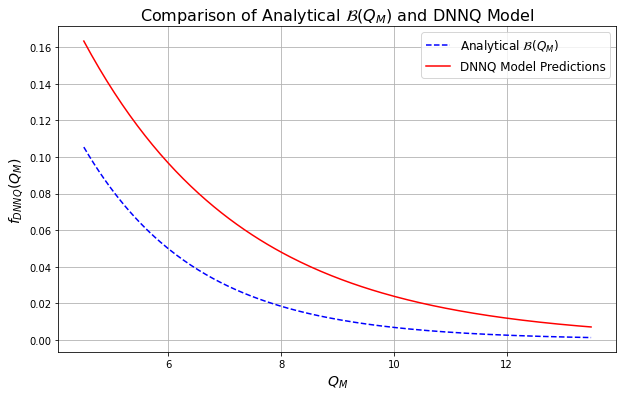

In [4]:
# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(QM_values, fDNNQ_values, label=r'Analytical $\mathcal{B}(Q_M)$', linestyle='--', color='blue')
plt.plot(QM_values, dnnQ_predictions, label='DNNQ Model Predictions', linestyle='-', color='red')
plt.xlabel(r'$Q_M$', fontsize=14)
plt.ylabel(r'$f_{DNNQ}(Q_M)$', fontsize=14)
plt.title('Comparison of Analytical $\mathcal{B}(Q_M)$ and DNNQ Model', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig(str(results_folder)+'/QM_comparison_plot.pdf')
plt.show()